# 데이터 분석

분석을 진행하기 앞서, 모든 분석은 Google의 Colab에서 수행되었음을 알려드립니다.

## 데이터 훑어보기

먼저 데이터를 내려받고 기초적인 부분들을 살펴보겠습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [ ]:
coffee = pd.read_csv('/content/drive/MyDrive/coffee_df_with_type_and_region.csv')
coffee

,slug,all_text,rating,roaster,name,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,type_blend,type_estate,type_peaberry,type_barrel_aged,type_aged,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/wilton-ben...,\n\n\n95\n\n\nJBC Coffee Roasters\nWilton Ben...,95,JBC Coffee Roasters,Wilton Benitez Geisha,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"Madison, Wisconsin","Piendamó, Cauca Department, Colombia",Medium-Light,$25.00/8 ounces,November 2022,59/81,9.0,9.0,9.0,9.0,9.0,NaN,"Richly floral-toned, exceptionally sweet. Dist...",Produced by Wilton Benitez of Macarena Farm en...,"A nuanced, complex experimentally processed Co..."
1,https://www.coffeereview.com/review/colombia-c...,\n\n\n95\n\n\nBird Rock Coffee Roasters\nColo...,95,Bird Rock Coffee Roasters,Colombia Cerro Azul Geisha,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"San Diego, California","Trujillo, Valle del Cauca Department, Colombia",Light,$59.00/8 ounces,November 2022,62/80,9.0,9.0,9.0,9.0,9.0,NaN,"Richly aromatic, chocolaty, fruit-toned. Dark ...",Produced by Rigoberto Herrera of Granja La Esp...,"A trifecta of fruit, chocolate and flowers, bo..."
2,https://www.coffeereview.com/review/yirgacheff...,\n\n\n94\n\n\nRegent Coffee\nYirgacheffe Meng...,94,Regent Coffee,Yirgacheffe Mengesha Natural,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,"Glendale, California","Yirgacheffe growing region, southern Ethiopia",Medium-Light,$20.50/12 ounces,November 2022,60/77,9.0,9.0,9.0,9.0,8.0,NaN,"High-toned, fruit-driven. Boysenberry, pear, c...",Produced at Mengesha Farm from selections of i...,A fruit medley in a cup — think boysenberry an...
3,https://www.coffeereview.com/review/colombia-t...,\n\n\n93\n\n\nRegent Coffee\nColombia Tolima ...,93,Regent Coffee,Colombia Tolima Finca El Mirador Washed Anaerobic,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"Glendale, California","Tolima, Colombia",Medium-Light,$20.50/12 ounces,November 2022,59/79,9.0,9.0,8.0,9.0,8.0,NaN,"Delicately fruit-toned. Guava, ginger blossom,...",Produced by Victor Gutiérrez of Finca Mirador ...,"An appealing washed anaerobic cup: deep-toned,..."
4,https://www.coffeereview.com/review/panama-gei...,\n\n\n94\n\n\nTheory Coffee Roasters\nPanama ...,94,Theory Coffee Roasters,Panama Geisha Finca Debra Symbiosis,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"Redding, California","Volcan growing region, western Panama",Light,$45.00/4 ounces,November 2022,62/80,9.0,9.0,9.0,9.0,8.0,NaN,"Richly fruit-forward, floral-toned. Lychee, te...",Produced by Jamison Savage of Finca Debra enti...,A floral- and fruit-driven anaerobic natural P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,https://www.coffeereview.com/review/coffea-div...,\n\n\n93\n\n\nOQ Coffee Co.\nCoffea Diversa C...,93,OQ Coffee Co.,Coffea Diversa Costa Rica Sudan Rume,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"Highland Park, New Jersey","Biolley, southern Costa Rica",Medium-Light,$28.00/8 ounces,December 2017,53/77,9.0,9.0,8.0,9.0,8.0,NaN,"Bright, crisp, deeply sweet. Honey, lilac, ced...",This coffee tied for the fourth-highest rating...,A fine introduction to a rare variety of Arabi...
2278,https://www.coffeereview.com/review/ethiopia-b...,\n\n\n94\n\n\nGreen Stone Coffee\nEthiopia Ba...,94,Green Stone Coffee,Ethiopia Banko Gotiti Natural G1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Taipei, Taiwan","Kochere, Yirgacheffe growing region, south-cen...",Light,NT $580/220 grams,December 2017,58/86,9.0,9.0,9.0,9.0,8.0,NaN,"Crisp, sweetly tart. Dark chocolate, pie cherr...",This coffee tied for the third-highest rating ...,An inviting natural-processed coffee from Ethi...
2279,https://www.coffeereview.com/review/auromar-ge...,\n\n\n96\n\n\nWilloughby's Coff

2282개의 레코드와 37개의 컬럼을 가지고 있습니다.

컬럼에 대한 정보를 확인해 보겠습니다.

In [ ]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   slug                    2282 non-null   object 
 1   all_text                2282 non-null   object 
 2   rating                  2282 non-null   int64  
 3   roaster                 2282 non-null   object 
 4   name                    2282 non-null   object 
 5   region_africa_arabia    2282 non-null   int64  
 6   region_caribbean        2282 non-null   int64  
 7   region_central_america  2282 non-null   int64  
 8   region_hawaii           2282 non-null   int64  
 9   region_asia_pacific     2282 non-null   int64  
 10  region_south_america    2282 non-null   int64  
 11  type_espresso           2282 non-null   int64  
 12  type_organic            2282 non-null   int64  
 13  type_fair_trade         2282 non-null   int64  
 14  type_decaffeinated      2282 non-null   

각 컬럼은 다음을 뜻합니다.

1. slug: Link data coffee, 커피 리뷰의 웹사이트 주소
2. all_text: All text scraping, 커피에 대한 모든 텍스트
3. rating: coffee rating, 커피에 대한 총점
4. roaster: coffee roaster
5. name: coffee name
6. region_africa_arabia: region coffee, region 컬럼의 경우 1이면 그 지역의 커피임을 의미
7. region_caribbean: region coffee
8. region_central_america: region coffee
9. region_hawaii: region coffee
10. region_asia_pacific: region coffee
11. region_south_america: region coffee
12. type_espresso: type coffee, type 컬럼의 경우 1이면 해당 type임을 의미
13. type_organic: type coffee
14. type_fair_trade: type coffee
15. type_decaffeinated: type coffee
16. type_best_value: type coffee
17. type_pod_capsule: type coffee
18. type_blend: type coffee
19. type_estate: type coffee
20. type_peaberry: type coffee
21. type_barrel_aged: type coffee
22. type_aged: type coffee
23. location: type coffee
24. origin: coffee origin, 에티오피아 남부 등 커피의 원산지
25. roast: type coffee roast, Light, Medium-Light 등 로스팅 포인트
26. est_price: coffee beans price
27. review_date: coffee review date
28. agtron: coffee agtron, 수치가 높을수록 색깔이 어두운(다크 로스팅된) 커피 
29. aroma: score coffee aroma
30. acid: score coffee acid
31. body: score coffee body
32. flavor: score coffee flavor
33. aftertaste: score coffee aftertaste
34. with_milk: score coffee with milk
35. desc_1: Blind assesment
36. desc_2: Notes, 원산지 등 커피에 대한 상세정보
37. desc_3: Bottom Line

이번 분석의 목표는 커피 평가 데이터를 바탕으로 커피를 여러 클러스터로 분할하는 것입니다. 각 클러스터에 속하는 커피들은 서로 비슷한 평가를 받은 커피일 것입니다. 

커피를 분류함(클러스터링)에 있어 데이터셋의 모든 컬럼을 사용하지 않겠습니다. 실제로 마시고 난 뒤 비슷한 느낌의 커피끼리 묶일 수 있도록 aroma, body, flavor 등의 컬럼만 사용합니다. 로스터가 누구인지, 가격이 얼마인지는 고려하지 않겠습니다.

이번 분석에서 사용할 컬럼은 다음과 같습니다.

1. name: coffee name
2. rating: coffee rating, 커피에 대한 총점
3. region_africa_arabia: region coffee, region 컬럼의 경우 1이면 그 지역의 커피임을 의미
4. region_caribbean: region coffee
5. region_central_america: region coffee
6. region_hawaii: region coffee
7. region_asia_pacific: region coffee
8. region_south_america: region coffee
9. type_pod_capsule: type coffee
10. type_blend: type coffee
11. roast: type coffee roast, Light, Medium-Light 등 로스팅 포인트
12. agtron: coffee agtron, 수치가 높을수록 색깔이 어두운(다크 로스팅된) 커피 
13. aroma: score coffee aroma
14. acid: score coffee acid
15. body: score coffee body
16. flavor: score coffee flavor
17. aftertaste: score coffee aftertaste
18. desc_1: Blind assesment

origin 컬럼의 지역 데이터는 region_hawaii 등과 같은 region 컬럼의 데이터를 사용할 것이므로 제외하겠습니다.

type 컬럼의 경우 나머지 type 컬럼의 type 여부와 관계 없이 사용할 예정이지만 블렌드 되지 않고 캡슐 형태가 아닌 커피 데이터만을 사용할 예정입니다. 블렌딩을 제외하는 이유는 각 커피 원두의 고유한 맛을 기준으로 커피를 분류하고 싶기 때문입니다. 

블라인드 평가로 얻은 desc_1 컬럼의 경우에는 앞의 몇 가지 평가 단어(e.g. Richly aromatic, chocolaty, fruit-toned)를 수치화하여 사용할 예정입니다. 


전체 데이터셋에서 사용할 레코드와 컬럼만을 추출하겠습니다. 우선, 커피 이름에 중복이 있는지 확인합니다.

In [ ]:
coffee.name.nunique()

2079

In [ ]:
coffee.name.value_counts(ascending=False).head(15)

Espresso Blend                     10
Cold Brew                           6
Holiday Blend                       6
Kona Mocca®                         5
Ethiopia Kayon Mountain             5
Esmeralda Estate Panama Geisha      5
Sumatra Tano Batak                  5
Colombia                            4
Guatemala Bella Carmona             4
Flight Seasonal Espresso            4
Bella Carmona Guatemala             4
Gigesa Ethiopia                     3
Ethiopia Kayon Mountain Natural     3
Memory Lane                         3
Karen J Kona Red Bourbon            3
Name: name, dtype: int64

2282개의 전체 레코드에서 고유한 커피의 이름은 2079개가 존재합니다. 에스프레소 블렌드의 경우에는 10개의 레코드가 존재합니다.

같은 커피라도 로스터가 누구인지, 얼마나 로스팅을 했는지, 수확 시기는 언제이며 평가 시기는 언제인지에 따라 평가가 달라질 수 있습니다.

이 모든 부분을 고려하기에는 어려우므로 커피 이름에 대하여 중복을 제거하고 이후 데이터 분석을 실행합니다.

In [ ]:
coffee = coffee.drop_duplicates(['name'], keep='first')
coffee.shape

(2079, 37)

2079개의 레코드가 남았습니다.

이제 블렌드, 캡슐 커피를 제외하고 필요한 컬럼만 추출한 데이터프레임을 생성합니다.

In [ ]:
df = coffee[coffee.type_blend==0]
df = df[df.type_pod_capsule==0]

df = df[['name', 'rating', 'region_africa_arabia', 'region_caribbean', 
         'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america', 
         'roast', 'agtron', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'desc_1']]
df

,name,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,roast,agtron,aroma,acid,body,flavor,aftertaste,desc_1
0,Wilton Benitez Geisha,95,0,0,0,0,0,1,Medium-Light,59/81,9.0,9.0,9.0,9.0,9.0,"Richly floral-toned, exceptionally sweet. Dist..."
1,Colombia Cerro Azul Geisha,95,0,0,0,0,0,1,Light,62/80,9.0,9.0,9.0,9.0,9.0,"Richly aromatic, chocolaty, fruit-toned. Dark ..."
2,Yirgacheffe Mengesha Natural,94,1,0,0,0,0,0,Medium-Light,60/77,9.0,9.0,9.0,9.0,8.0,"High-toned, fruit-driven. Boysenberry, pear, c..."
3,Colombia Tolima Finca El Mirador Washed Anaerobic,93,0,0,0,0,0,1,Medium-Light,59/79,9.0,9.0,8.0,9.0,8.0,"Delicately fruit-toned. Guava, ginger blossom,..."
4,Panama Geisha Finca Debra Symbiosis,94,0,0,1,0,0,0,Light,62/80,9.0,9.0,9.0,9.0,8.0,"Richly fruit-forward, floral-toned. Lychee, te..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,Los Congos Pacamara Honey,93,0,0,1,0,0,0,Light,58/84,9.0,8.0,9.0,9.0,8.0,"Sweetly pungent, richly savory-toned. Blackber..."
2277,Coffea Diversa Costa Rica Sudan Rume,93,0,0,1,0,0,0,Medium-Light,53/77,9.0,9.0,8.0,9.0,8.0,"Bright, crisp, deeply sweet. Honey, lilac, ced..."
2278,Ethiopia Banko Gotiti Natural G1,94,1,0,0,0,0,0,Light,58/86,9.0,9.0,9.0,9.0,8.0,"Crisp, sweetly tart. Dark chocolate, pie cherr..."
2279,Panama Auromar Geisha Natural,96,0,0,1,0,0,0,Medium-Light,56/80,10.0,9.0,9.0,9.0,9.0,"Complex, uniquely sweet, tropical. Plumeria, r..."


16개의 컬럼을 가진 1809개의 데이터 레코드가 생성되었습니다.

## 데이터 전처리



### 누락값 전처리

데이터셋에 적용할 군집 알고리즘은 사이킷런의 KMeans입니다. 사이킷런의 입력으로 활용할 수 있도록 데이터셋을 적절히 전처리 하겠습니다.

우선은 누락값이 얼마나 있는지 확인합니다.

In [ ]:
df.isnull().sum()

name                        0
rating                      0
region_africa_arabia        0
region_caribbean            0
region_central_america      0
region_hawaii               0
region_asia_pacific         0
region_south_america        0
roast                      26
agtron                      0
aroma                      18
acid                      155
body                        2
flavor                      2
aftertaste                  2
desc_1                      0
dtype: int64

In [ ]:
misscnt = df.isnull().sum(axis=1)   
misscnt.value_counts()

0    1632
1     155
2      20
5       2
dtype: int64

커피의 산미에 대한 평가가 155개의 커피에서 누락되었습니다. 이외에도 로스팅 포인트(roast), flavor 등 다른 컬럼에서도 누락이 나타났습니다.

평균값 대치, k-최근접 이웃 기반 대치 등 누락값을 채워 넣을 수 있겠지만 이번 분석에서는 누락된 데이터는 모두 제거하겠습니다. 

In [ ]:
df = df.dropna()
df.isnull().sum()

name                      0
rating                    0
region_africa_arabia      0
region_caribbean          0
region_central_america    0
region_hawaii             0
region_asia_pacific       0
region_south_america      0
roast                     0
agtron                    0
aroma                     0
acid                      0
body                      0
flavor                    0
aftertaste                0
desc_1                    0
dtype: int64

### roast 컬럼 전처리

다음으로 roast 컬럼을 전처리 합니다.

roast 컬럼의 빈도는 다음과 같습니다.

In [ ]:
df.roast.value_counts()

Medium-Light    1204
Light            290
Medium           123
Medium-Dark       14
Dark               1
Name: roast, dtype: int64

roast 컬럼의 데이터는 원핫 인코딩 하겠습니다. 판다스의 get_dummies 메서드를 사용합니다.

In [ ]:
df = pd.get_dummies(df, columns=['roast'])
df

,name,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,agtron,aroma,acid,body,flavor,aftertaste,desc_1,roast_Dark,roast_Light,roast_Medium,roast_Medium-Dark,roast_Medium-Light
0,Wilton Benitez Geisha,95,0,0,0,0,0,1,59/81,9.0,9.0,9.0,9.0,9.0,"Richly floral-toned, exceptionally sweet. Dist...",0,0,0,0,1
1,Colombia Cerro Azul Geisha,95,0,0,0,0,0,1,62/80,9.0,9.0,9.0,9.0,9.0,"Richly aromatic, chocolaty, fruit-toned. Dark ...",0,1,0,0,0
2,Yirgacheffe Mengesha Natural,94,1,0,0,0,0,0,60/77,9.0,9.0,9.0,9.0,8.0,"High-toned, fruit-driven. Boysenberry, pear, c...",0,0,0,0,1
3,Colombia Tolima Finca El Mirador Washed Anaerobic,93,0,0,0,0,0,1,59/79,9.0,9.0,8.0,9.0,8.0,"Delicately fruit-toned. Guava, ginger blossom,...",0,0,0,0,1
4,Panama Geisha Finca Debra Symbiosis,94,0,0,1,0,0,0,62/80,9.0,9.0,9.0,9.0,8.0,"Richly fruit-forward, floral-toned. Lychee, te...",0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,Los Congos Pacamara Honey,93,0,0,1,0,0,0,58/84,9.0,8.0,9.0,9.0,8.0,"Sweetly pungent, richly savory-toned. Blackber...",0,1,0,0,0
2277,Coffea Diversa Costa Rica Sudan Rume,93,0,0,1,0,0,0,53/77,9.0,9.0,8.0,9.0,8.0,"Bright, crisp, deeply sweet. Honey, lilac, ced...",0,0,0,0,1
2278,Ethiopia Banko Gotiti Natural G1,94,1,0,0,0,0,0,58/86,9.0,9.0,9.0,9.0,8.0,"Crisp, sweetly tart. Dark chocolate, pie cherr...",0,1,0,0,0
2279,Panama Auromar Geisha Natural,96,0,0,1,0,0,0,56/80,10.0,9.0,9.0,9.0,9.0,"Complex, uniquely sweet, tropical. Plumeria, r...",0,0,0,0,1


### agtron 컬럼 전처리

다음으로는 agtron 컬럼을 전처리 하겠습니다. agtron은 roast와 유사한 의미를 가집니다. X/Y로 표현되는 데이터에서 X가 커질수록 다크 로스팅된 커피입니다.

이 컬럼의 경우에는 X와 Y를 추출한 후 X에서 Y를 나눈 값을 특성으로 사용하겠습니다.

agtron 데이터가 NA/NA인 경우 누락값에서와 같이 제거하겠습니다.

In [ ]:
df = df.loc[df.agtron!='NA/NA', :]

df['agt1'] = df.agtron.str.split('/').str[0].astype(int)
df['agt2'] = df.agtron.str.split('/').str[1].astype(int)
df['agtron'] = df['agt1'] / df['agt2']

df.drop(['agt1', 'agt2'], axis=1, inplace=True)
df

,name,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,agtron,aroma,acid,body,flavor,aftertaste,desc_1,roast_Dark,roast_Light,roast_Medium,roast_Medium-Dark,roast_Medium-Light
0,Wilton Benitez Geisha,95,0,0,0,0,0,1,0.728395,9.0,9.0,9.0,9.0,9.0,"Richly floral-toned, exceptionally sweet. Dist...",0,0,0,0,1
1,Colombia Cerro Azul Geisha,95,0,0,0,0,0,1,0.775000,9.0,9.0,9.0,9.0,9.0,"Richly aromatic, chocolaty, fruit-toned. Dark ...",0,1,0,0,0
2,Yirgacheffe Mengesha Natural,94,1,0,0,0,0,0,0.779221,9.0,9.0,9.0,9.0,8.0,"High-toned, fruit-driven. Boysenberry, pear, c...",0,0,0,0,1
3,Colombia Tolima Finca El Mirador Washed Anaerobic,93,0,0,0,0,0,1,0.746835,9.0,9.0,8.0,9.0,8.0,"Delicately fruit-toned. Guava, ginger blossom,...",0,0,0,0,1
4,Panama Geisha Finca Debra Symbiosis,94,0,0,1,0,0,0,0.775000,9.0,9.0,9.0,9.0,8.0,"Richly fruit-forward, floral-toned. Lychee, te...",0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,Los Congos Pacamara Honey,93,0,0,1,0,0,0,0.690476,9.0,8.0,9.0,9.0,8.0,"Sweetly pungent, richly savory-toned. Blackber...",0,1,0,0,0
2277,Coffea Diversa Costa Rica Sudan Rume,93,0,0,1,0,0,0,0.688312,9.0,9.0,8.0,9.0,8.0,"Bright, crisp, deeply sweet. Honey, lilac, ced...",0,0,0,0,1
2278,Ethiopia Banko Gotiti Natural G1,94,1,0,0,0,0,0,0.674419,9.0,9.0,9.0,9.0,8.0,"Crisp, sweetly tart. Dark chocolate, pie cherr...",0,1,0,0,0
2279,Panama Auromar Geisha Natural,96,0,0,1,0,0,0,0.700000,10.0,9.0,9.0,9.0,9.0,"Complex, uniquely sweet, tropical. Plumeria, r...",0,0,0,0,1


새로운 agtron 값의 분포를 보면 이상값 2개가 있음을 확인할 수 있습니다. 

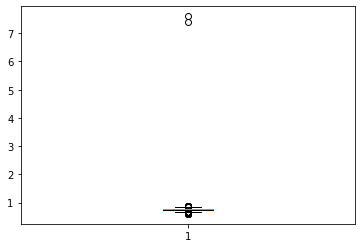

In [ ]:
plt.boxplot(df.agtron)
plt.show()

이상값을 제거한 후 값의 분포를 다시 보겠습니다.

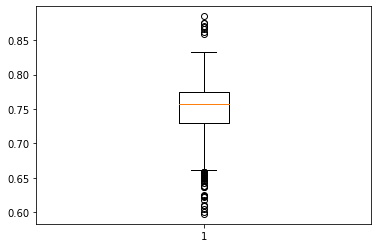

In [ ]:
df = df.loc[df.agtron<1]

plt.boxplot(df.agtron)
plt.show()

### 수치형 컬럼 전처리

다음으론 수치형 데이터를 가지고 있는 rating, aroma, acid, body, flavor, aftertaste 컬럼을 전처리 하겠습니다.

우선 이들 컬럼의 값들의 분포를 확인하면 다음과 같습니다.

In [ ]:
df[['rating', 'aroma', 'acid', 'body', 'flavor', 'aftertaste']].describe()

,rating,aroma,acid,body,flavor,aftertaste
count,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,93.212569,8.874307,8.552680,8.655576,9.001848,8.131855
std,1.532964,0.383345,0.536719,0.488125,0.317001,0.481330
min,84.000000,7.000000,6.000000,7.000000,7.000000,7.000000
25%,92.000000,9.000000,8.000000,8.000000,9.000000,8.000000
50%,93.000000,9.000000,9.000000,9.000000,9.000000,8.000000
75%,94.000000,9.000000,9.000000,9.000000,9.000000,8.000000
max,98.000000,10.000000,10.000000,10.000000,10.000000,9.000000


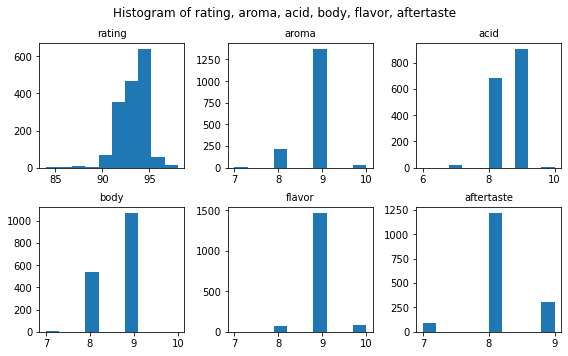

In [ ]:
cols = ['rating', 'aroma', 'acid', 'body', 'flavor', 'aftertaste']

fig, axes = plt.subplots(2,3, figsize=(8, 5))
fig.suptitle('Histogram of rating, aroma, acid, body, flavor, aftertaste')
axes = axes.ravel()

for j, ax in enumerate(axes):
    ax.hist(df[cols[j]])
    ax.set_title(cols[j], fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

10점 만점의 평가에서 11점 이상의 점수를 받거나, 평가가 누락된 커피가 존재하지 않는 것 같습니다.

이 6개의 컬럼은 그대로 사용합니다.

### 블라인드 평가 컬럼 전처리

마지막으로 블라인드 평가 기반으로 얻어진 desc_1 컬럼을 전처리하겠습니다.

desc_1 컬럼은 다음과 같은 데이터를 저장합니다.

In [ ]:
df.desc_1[0]

'Richly floral-toned, exceptionally sweet. Distinct narcissus, cocoa nib, myrrh, blackberry, lemon thyme in aroma and cup. Complex bittersweet structure with floral acidity; very full, syrupy-smooth mouthfeel. Engaging, satisfying finish that carries over all aromas and flavors from the cup.'

커피에 대한 평가를 문자열로 저장하고 있습니다.

이 데이터를 처리하는 방향은 다음과 같습니다.

1. 문자열을 split() 함수로 쪼개어 리스트 형태로 저장
2. 리스트를 바탕으로 Word2Vec 모델 훈련
3. 리스트의 앞에서부터 3개 단어를 벡터화

많지 않은 데이터로 언어 모델을 훈련한 후 주어진 데이터를 벡터화하면 그다지 정확한 결과가 나오지 않을 수 있습니다. 이번 포스팅에서는 임베딩 벡터의 크기 또한 32로 단어를 정확하게 표현하지 못합니다. 이 과정의 목표는 각 단어를 정확히 벡터로 표현하는 것 보다는 모델이 클러스터링에 사용할 수 있도록 각 커피의 구체적인 평가를 숫자로 나타내는 것입니다. 이 점 참고해주시기 바랍니다.

우선 전체 문자열을 분할합니다. Richly floral-toned, exceptionally sweet. Distinct narcissus와 같이 커피를 평가하는 단어는 ',' 또는 '.' 등으로 구분됩니다.

re 모듈을 사용하여 ',.:;' 에 대해서 문자열을 분할합니다.



In [ ]:
import re

df['blind'] = df['desc_1'].apply(lambda x: re.split('[.,;:]', x))
df['blind'].apply(lambda x: x.pop())         # 마지막 공백 ' ' 제거
df.blind

0       [Richly floral-toned,  exceptionally sweet,  D...
1       [Richly aromatic,  chocolaty,  fruit-toned,  D...
2       [High-toned,  fruit-driven,  Boysenberry,  pea...
3       [Delicately fruit-toned,  Guava,  ginger bloss...
4       [Richly fruit-forward,  floral-toned,  Lychee,...
                              ...                        
2276    [Sweetly pungent,  richly savory-toned,  Black...
2277    [Bright,  crisp,  deeply sweet,  Honey,  lilac...
2278    [Crisp,  sweetly tart,  Dark chocolate,  pie c...
2279    [Complex,  uniquely sweet,  tropical,  Plumeri...
2281    [Spice-toned,  richly sweet,  Raspberry,  dark...
Name: blind, Length: 1623, dtype: object

In [ ]:
df.blind[0]

['Richly floral-toned',
 ' exceptionally sweet',
 ' Distinct narcissus',
 ' cocoa nib',
 ' myrrh',
 ' blackberry',
 ' lemon thyme in aroma and cup',
 ' Complex bittersweet structure with floral acidity',
 ' very full',
 ' syrupy-smooth mouthfeel',
 ' Engaging',
 ' satisfying finish that carries over all aromas and flavors from the cup']

그다음 Word2Vec을 사용해 보겠습니다.

gensim 패키지를 설치합니다.

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Word2Vec() 함수를 통해 word2vec을 실행합니다.

한 단어를 표현하는 벡터의 차수는 32로 하겠습니다. 

In [ ]:
from gensim.models.word2vec import Word2Vec

data = df.blind.to_list()

model = Word2Vec(data,         
                 sg=1,         
                 size=32,     
                 window=3,     
                 min_count=0,  
                 workers=1)    

훈련된 모델의 예시를 들어보면 다음과 같습니다.

In [ ]:
model.wv['High-toned']   # 단어의 벡터 표현

array([ 0.1184459 , -0.24566008,  0.03241926,  0.0237678 ,  0.44353062,
        0.22944087,  0.2208332 , -0.07669082, -0.07565875,  0.21450113,
        0.00845855, -0.10505883,  0.3980535 , -0.25180432,  0.09646916,
        0.20160714,  0.08536318, -0.08889626,  0.00169118, -0.04036665,
        0.08391959,  0.1445313 ,  0.01595939, -0.10634228, -0.10179059,
        0.18280001,  0.30445468,  0.05369906, -0.42286408,  0.35068336,
        0.10048109,  0.23357466], dtype=float32)

In [ ]:
model.wv.similarity(' Spice-toned', ' pear'), model.wv.similarity(' fruit-driven', ' deeply sweet')   # 두 단어 사이의 유사도

(0.7826727, 0.9912689)

In [ ]:
model.wv.most_similar(' chocolaty')   # 가장 비슷한 단어들 

[(' balanced', 0.9989500045776367),
 (' floral-toned', 0.9984074831008911),
 (' deep', 0.9983788132667542),
 (' apricot', 0.9981533885002136),
 (' Cocoa nib', 0.9981145858764648),
 (' Dark chocolate', 0.9980893731117249),
 (' fruit-toned', 0.998078465461731),
 (' Raspberry', 0.9980418086051941),
 (' roasted cacao nib', 0.9980181455612183),
 (' oak', 0.9979255199432373)]

이제 리스트의 앞에서부터 3개의 단어를 추출하고, 이 단어들을 벡터화한 뒤 데이터프레임에 추가하겠습니다.

In [ ]:
first3 = []

for word in data:
  word3 = word[:3]
  first3.append(word3)

In [ ]:
result = []

for i in range(len(first3)):
  for j in range(3):
    result.append(model.wv[first3[i][j]].tolist())

result_array = np.array(result)
result_array = result_array.reshape(-1, 96)
result_array.shape

(1623, 96)

In [ ]:
blind_df = pd.DataFrame(result_array)
blind_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0.035587,-0.043744,-0.005184,0.010117,0.083649,0.038611,0.043506,-0.003005,-0.015737,0.042191,-0.013653,-0.012514,0.059350,-0.031042,0.006318,0.024659,0.010041,-0.012528,0.014580,-0.016562,0.020424,0.036146,-0.002222,-0.015476,-0.005317,0.022637,0.058030,-0.004257,-0.085076,0.050242,0.020938,0.038653,0.004692,-0.028128,0.006032,0.008406,0.038503,0.022029,0.028181,-0.013729,0.007341,0.011650,0.000973,-0.008184,0.028668,-0.021776,0.024114,0.015030,-0.004213,-0.023233,-0.001408,-0.016550,0.002515,-0.001792,0.009066,-0.016942,-0.000668,0.024756,0.013407,0.009093,-0.040169,0.028704,-0.003381,0.008823,0.002546,-0.019701,0.009360,0.005459,0.002636,0.020207,0.012204,-0.013144,-0.002107,0.003721,-0.004636,-0.006125,0.031082,-0.009142,-0.010395,-0.004095,0.017483,0.005193,0.003059,0.011445,-0.009485,0.003807,-0.012982,-0.018154,0.003120,-0.005011,0.015798,0.000647,-0.017146,0.009026,0.015077,-0.001489
1,0.041798,-0.118090,-0.003186,0.021530,0.183035,0.109276,0.112591,-0.033281,-0.042023,0.082113,-0.010552,-0.053989,0.181782,-0.093716,0.046109,0.085017,0.040817,-0.059639,0.000403,-0.012298,0.048146,0.060369,0.016289,-0.063441,-0.034831,0.074002,0.126361,0.011023,-0.187616,0.152121,0.060518,0.111233,0.140547,-0.292633,0.042701,0.018003,0.483391,0.261696,0.279928,-0.105003,-0.096614,0.203938,-0.015833,-0.131440,0.487262,-0.287429,0.150160,0.236887,0.123630,-0.103938,0.015450,-0.038756,0.095873,0.158722,0.040015,-0.155393,-0.131662,0.195525,0.353968,0.059491,-0.500146,0.414961,0.124786,0.272428,0.095758,-0.225618,0.006304,0.030393,0.379158,0.184937,0.210009,-0.069577,-0.081940,0.163807,-0.011491,-0.093674,0.371743,-0.217725,0.105957,0.181319,0.077170,-0.083345,0.020743,-0.043312,0.088676,0.124206,0.031243,-0.113107,-0.094367,0.154526,0.241458,0.064453,-0.377416,0.314926,0.096743,0.210939
2,0.118446,-0.245660,0.032419,0.023768,0.443531,0.229441,0.220833,-0.076691,-0.075659,0.214501,0.008459,-0.105059,0.398053,-0.251804,0.096469,0.201607,0.085363,-0.088896,0.001691,-0.040367,0.083920,0.144531,0.015959,-0.106342,-0.101791,0.182800,0.304455,0.053699,-0.422864,0.350683,0.100481,0.233575,0.065341,-0.100400,0.014314,0.015730,0.207631,0.107888,0.113140,-0.019285,-0.027309,0.080369,-0.009031,-0.049989,0.178626,-0.102136,0.042417,0.106125,0.030841,-0.038181,0.015835,-0.032385,0.028028,0.067190,0.009511,-0.064554,-0.052152,0.073502,0.143168,0.017743,-0.190485,0.177234,0.059367,0.118658,-0.001977,-0.035187,0.016703,0.007175,0.033271,0.028948,0.012654,-0.022484,0.000973,0.024973,0.008212,-0.000593,0.050870,-0.013713,-0.000995,0.032817,-0.000431,-0.000567,0.015373,-0.006064,0.009595,-0.000001,0.009164,-0.019922,-0.006845,0.015550,0.040068,-0.003428,-0.042017,0.034001,-0.003640,0.029222
3,0.020792,-0.063149,0.001081,0.018611,0.119511,0.076065,0.064222,-0.026557,-0.037307,0.066494,0.008137,-0.023956,0.121143,-0.073356,0.032981,0.052135,0.039419,-0.036128,0.008199,0.001001,0.020540,0.049201,0.022678,-0.025368,-0.025370,0.062428,0.089812,0.012609,-0.116639,0.096873,0.032084,0.056207,0.036140,-0.114485,0.020706,0.024247,0.178851,0.103596,0.108196,-0.019244,-0.037808,0.078676,0.007393,-0.055317,0.183215,-0.094521,0.045588,0.071046,0.037528,-0.053985,0.004983,-0.001196,0.047437,0.068751,-0.000284,-0.060267,-0.056878,0.065112,0.110986,0.022105,-0.198389,0.168016,0.036284,0.109549,0.103532,-0.206674,0.001704,0.015237,0.340377,0.191006,0.203031,-0.051542,-0.087288,0.155739,0.000794,-0.111121,0.340353,-0.196128,0.091083,0.166247,0.072816,-0.076558,0.006605,-0.025533,0.062135,0.103232,0.017499,-0.110864,-0.087608,0.137535,0.231522,0.058790,-0.382006,0.287911,0.079405,0.203694
4,0.003364,-0.030896,0.005406,-0.009591,0.053891,0.015367,0.018068,-0.020165,0.002920,0.028505,-0.012790,-0.024201,0

1623개의 커피에 대한 3가지 평가 단어를 벡터화한 후 이를 저장한 데이터프레임을 생성했습니다.

한 단어가 32차원의 벡터로 표현되고, 각 커피당 3가지 단어이므로 96개의 컬럼을 가지고 있습니다.

blind_df의 데이터 레코드 순서는 df의 데이터 레코드 순서와 동일하므로 두 데이터프레임을 옆으로 이어붙이겠습니다.

In [ ]:
df['mergeon'] = range(len(df))
blind_df['mergeon'] = range(len(blind_df))

df_all = pd.merge(df, blind_df, on='mergeon', how='inner')

필요없는 컬럼 desc_1, blind, mergeon은 제거합니다.

In [ ]:
df_all.drop(['blind', 'desc_1', 'mergeon'], axis=1, inplace=True)

df_all.head()

,name,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,agtron,aroma,acid,body,flavor,aftertaste,roast_Dark,roast_Light,roast_Medium,roast_Medium-Dark,roast_Medium-Light,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,Wilton Benitez Geisha,95,0,0,0,0,0,1,0.728395,9.0,9.0,9.0,9.0,9.0,0,0,0,0,1,0.035587,-0.043744,-0.005184,0.010117,0.083649,0.038611,0.043506,-0.003005,-0.015737,0.042191,-0.013653,-0.012514,0.059350,-0.031042,0.006318,0.024659,0.010041,-0.012528,0.014580,-0.016562,0.020424,0.036146,-0.002222,-0.015476,-0.005317,0.022637,0.058030,-0.004257,-0.085076,0.050242,0.020938,0.038653,0.004692,-0.028128,0.006032,0.008406,0.038503,0.022029,0.028181,-0.013729,0.007341,0.011650,0.000973,-0.008184,0.028668,-0.021776,0.024114,0.015030,-0.004213,-0.023233,-0.001408,-0.016550,0.002515,-0.001792,0.009066,-0.016942,-0.000668,0.024756,0.013407,0.009093,-0.040169,0.028704,-0.003381,0.008823,0.002546,-0.019701,0.009360,0.005459,0.002636,0.020207,0.012204,-0.013144,-0.002107,0.003721,-0.004636,-0.006125,0.031082,-0.009142,-0.010395,-0.004095,0.017483,0.005193,0.003059,0.011445,-0.009485,0.003807,-0.012982,-0.018154,0.003120,-0.005011,0.015798,0.000647,-0.017146,0.009026,0.015077,-0.001489
1,Colombia Cerro Azul Geisha,95,0,0,0,0,0,1,0.775000,9.0,9.0,9.0,9.0,9.0,0,1,0,0,0,0.041798,-0.118090,-0.003186,0.021530,0.183035,0.109276,0.112591,-0.033281,-0.042023,0.082113,-0.010552,-0.053989,0.181782,-0.093716,0.046109,0.085017,0.040817,-0.059639,0.000403,-0.012298,0.048146,0.060369,0.016289,-0.063441,-0.034831,0.074002,0.126361,0.011023,-0.187616,0.152121,0.060518,0.111233,0.140547,-0.292633,0.042701,0.018003,0.483391,0.261696,0.279928,-0.105003,-0.096614,0.203938,-0.015833,-0.131440,0.487262,-0.287429,0.150160,0.236887,0.123630,-0.103938,0.015450,-0.038756,0.095873,0.158722,0.040015,-0.155393,-0.131662,0.195525,0.353968,0.059491,-0.500146,0.414961,0.124786,0.272428,0.095758,-0.225618,0.006304,0.030393,0.379158,0.184937,0.210009,-0.069577,-0.081940,0.163807,-0.011491,-0.093674,0.371743,-0.217725,0.105957,0.181319,0.077170,-0.083345,0.020743,-0.043312,0.088676,0.124206,0.031243,-0.113107,-0.094367,0.154526,0.241458,0.064453,-0.377416,0.314926,0.096743,0.210939
2,Yirgacheffe Mengesha Natural,94,1,0,0,0,0,0,0.779221,9.0,9.0,9.0,9.0,8.0,0,0,0,0,1,0.118446,-0.245660,0.032419,0.023768,0.443531,0.229441,0.220833,-0.076691,-0.075659,0.214501,0.008459,-0.105059,0.398053,-0.251804,0.096469,0.201607,0.085363,-0.088896,0.001691,-0.040367,0.083920,0.144531,0.015959,-0.106342,-0.101791,0.182800,0.304455,0.053699,-0.422864,0.350683,0.100481,0.233575,0.065341,-0.100400,0.014314,0.015730,0.207631,0.107888,0.113140,-0.019285,-0.027309,0.080369,-0.009031,-0.049989,0.178626,-0.102136,0.042417,0.106125,0.030841,-0.038181,0.015835,-0.032385,0.028028,0.067190,0.009511,-0.064554,-0.052152,0.073502,0.143168,0.017743,-0.190485,0.177234,0.059367,0.118658,-0.001977,-0.035187,0.016703,0.007175,0.033271,0.028948,0.012654,-0.022484,0.000973,0.024973,0.008212,-0.000593,0.050870,-0.013713,-0.000995,0.032817,-0.000431,-0.000567,0.015373,-0.006064,0.009595,-0.000001,0.009164,-0.019922,-0.006845,0.015550,0.040068,-0.003428,-0.042017,0.034001,-0.003640,0.029222
3,Colombia Tolima Finca El Mirador Washed Anaerobic,93,0,0,0,0,0,1,0.746835,9.0,9.0,8.0,9.0,8.0,0,0,0,0,1,0.020792,-0.063149,0.001081,0.018611,0.119511,0.076065,0.064222,-0.026557,-0.037307,0.066494,0.008137,-0.023956,0.121143,-0.073356,0.032981,0.052135,0.039419,-0.036128,0.008199,0.001001,0.020540,0.049201,0.022678,-0.025368,-0.025370,0.062428,0.089812,0.012609,-0.116639,0.096873,0.032084,0.056207,0.036140,-0.114485,0.020706,0.024247,0.178851,0.103596,0.108196,-0.019244,-0.037808,0.078676,0.007393,-0.055317,0.183215,-0.094

이제 데이터 전처리가 완료되었습니다.

다음 과정부터는 사이킷런을 사용하여 커피 클러스터링 모델을 훈련해 보겠습니다.

## 모델 훈련

앞서 언급했듯 커피를 분류하는 군집 알고리즘은 사이킷런의 KMeans를 사용합니다. 

df_all의 rating부터 95까지의 데이터를 X로 저장하여 모델의 입력으로 사용하겠습니다. 

다만 X를 바로 모델에 입력하는 것이 아닌, 몇 가지 전처리를 더 하겠습니다. 

이번 과정에서는 다음과 같은 추가 전처리를 실행합니다.

- StandardScaler를 사용한 표준화
- (선택) PCA 혹은 KPCA를 사용한 데이터 압축

학습 데이터에 표준화를 적용한 뒤, 1) 표준화만 적용한 모델, 2) 표준화 후 PCA를 적용한 모델, 3) 표준화 후 KPCA를 적용한 모델의 성능을 각각 비교하여 가장 좋은 성능을 가진 모델을 사용하겠습니다.

우선 표준화부터 시작합니다.

In [ ]:
X = df_all.iloc[:, 1:].to_numpy()

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

KMeans를 사용할 때 가장 중요한 점은 적절한 클러스터 개수 k를 구하는 것입니다.

우선, k의 개수를 변화시켜가며 계산된 inertia가 어떻게 변하는지 확인해 보겠습니다. 

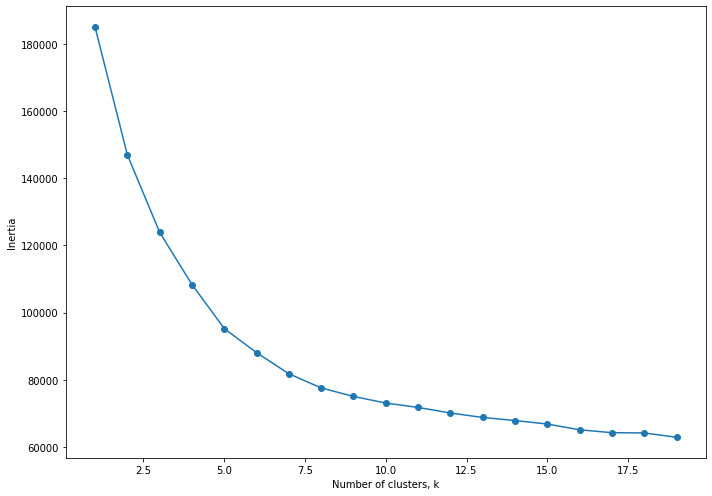

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(X_std)
    inertia.append(km.inertia_)
plt.figure(figsize=(10, 7))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

inertia 값이 꺾이는 부분을 찾아 최적의 클러스터 개수를 찾으려 하였으나(엘보우 방법) 그러한 지점이 명확하게 보이지는 않습니다.

이번에는 군집 개수를 다르게 하며 실루엣 계수의 평균을 계산해 보겠습니다.



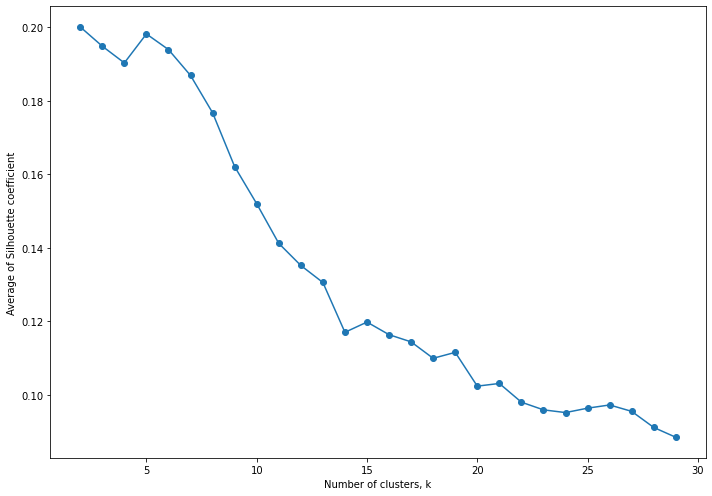

In [ ]:
from sklearn.metrics import silhouette_samples

avg_sil = []
for i in range(2, 30):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(X_std)
    y_km = km.fit_predict(X_std)
    
    silhouette_vals = silhouette_samples(X_std, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)
    avg_sil.append(silhouette_avg)
    
plt.figure(figsize=(10, 7))
plt.plot(range(2, 30), avg_sil, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average of Silhouette coefficient')
plt.tight_layout()
plt.show()

k=5 이후 k가 증가할수록 실루엣 평균 계수가 감소하고 있습니다. 

PCA, KPCA를 적용한 뒤에는 어떻게 변하는지 확인해 보겠습니다.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0)
X_pca = pca.fit_transform(X_std)

pca.n_components_

26

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=27, kernel='rbf', random_state=0)
X_kpca = kpca.fit_transform(X_std)

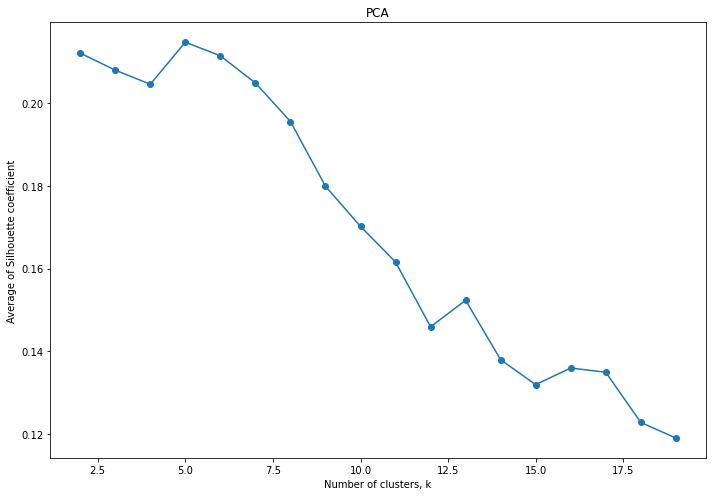

In [ ]:
from sklearn.metrics import silhouette_samples

avg_sil = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(X_pca)
    y_km = km.fit_predict(X_pca)
    
    silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)
    avg_sil.append(silhouette_avg)
    
plt.figure(figsize=(10, 7))
plt.plot(range(2, 20), avg_sil, marker='o')
plt.title('PCA')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average of Silhouette coefficient')
plt.tight_layout()
plt.show()

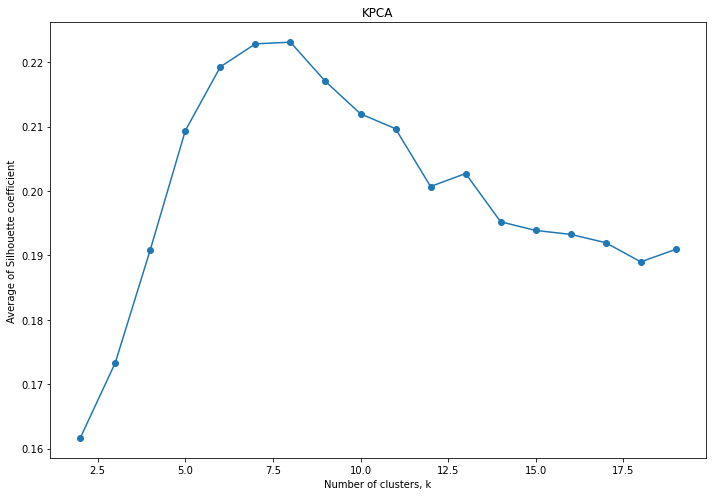

In [ ]:
from sklearn.metrics import silhouette_samples

avg_sil = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(X_kpca)
    y_km = km.fit_predict(X_kpca)
    
    silhouette_vals = silhouette_samples(X_kpca, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)
    avg_sil.append(silhouette_avg)
    
plt.figure(figsize=(10, 7))
plt.plot(range(2, 20), avg_sil, marker='o')
plt.title('KPCA')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average of Silhouette coefficient')
plt.tight_layout()
plt.show()

PCA를 적용한 결과는 표준화만 적용한 경우와 비슷하나 KPCA를 적용한 경우 평균 실루엣 계수의 그래프가 확연하게 차이나고 있습니다.

세 가지 경우에서, KPCA를 적용한 후 k=8 일 때의 평균 실루엣 계수가 가장 높으므로 이 조건에서 모델을 훈련하겠습니다.

KPCA 적용 후 클러스터의 개수가 8개일 때 실루엣 그래프가 어떻게 그려지는지 확인해 보겠습니다.

In [ ]:
def silhouette(X, k):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    from sklearn.cluster import KMeans

    km = KMeans(n_clusters=k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            random_state=0)
    y_km = km.fit_predict(X)
    
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

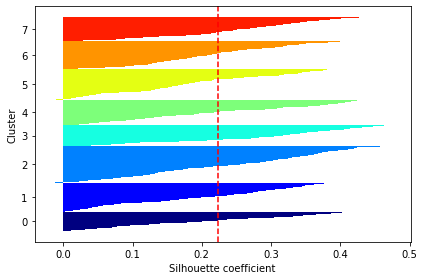

In [ ]:
silhouette(X_kpca, 8)        # k=8

이제 모델을 훈련해 보겠습니다. 이 모델의 클러스터링 결과를 바탕으로 각 클러스터당 어떤 특징이 있는지 확인해 보겠습니다.

In [ ]:
model = KMeans(n_clusters=8, 
               init='k-means++', 
               n_init=10, 
               max_iter=300,
               random_state=0)

model.fit(X_kpca)
y = model.predict(X_kpca)
silhouette_vals = silhouette_samples(X_kpca, y, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)

print('silhouette_avg: ', silhouette_avg)

df['cluster'] = y
df_all['cluster'] = y

silhouette_avg:  0.22310028307756355


## 클러스터링 결과 확인

우선 각 클러스터의 크기가 어떻게 되는지 확인합니다.

In [ ]:
df_all.cluster.value_counts()

2    274
5    233
1    222
6    209
4    192
7    184
3    163
0    146
Name: cluster, dtype: int64

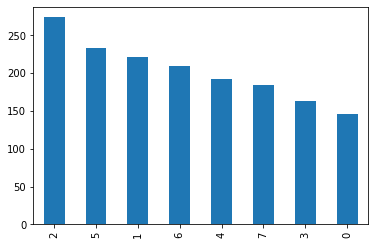

In [ ]:
df_all.cluster.value_counts().plot.bar()
plt.show()

실루엣 그래프에서 확인했듯 각 클러스터의 크기가 크게 차이 나지는 않습니다. 가장 큰(포함된 샘플이 많은) 클러스터는 클러스터 2이고, 274종의 커피가 포함되어 있습니다.

각 클러스터당 rating의 분포가 어떻게 되는지 확인합니다.

In [ ]:
def desc(col):
  return df_all[[col, 'cluster']].groupby('cluster').describe(percentiles=np.arange(0.1, 1.0, 0.1))

def hist(col):
  cluster = [0, 1, 2, 3, 4, 5, 6 ,7]

  fig, axes = plt.subplots(2,4, figsize=(10, 7))
  fig.suptitle(col)
  axes = axes.ravel()

  for j, ax in enumerate(axes):
      ax.hist(df_all.loc[df_all.cluster==j, col])
      ax.set_title(cluster[j], fontsize=10)

  plt.tight_layout()
  fig.subplots_adjust(top=0.88)
  plt.show()

In [ ]:
desc('rating')

rating                                                                 \
         count       mean       std   min   10%   20%   30%   40%   50%   60%   
cluster                                                                         
0        146.0  93.397260  1.299758  89.0  92.0  92.0  93.0  93.0  93.5  94.0   
1        222.0  93.454955  1.299233  90.0  92.0  92.2  93.0  93.0  94.0  94.0   
2        274.0  93.467153  1.731209  87.0  92.0  92.0  93.0  93.0  93.0  94.0   
3        163.0  93.042945  1.520842  87.0  91.0  92.0  92.0  93.0  93.0  93.2   
4        192.0  92.713542  1.632851  88.0  91.0  91.0  92.0  92.0  93.0  93.0   
5        233.0  93.240343  1.611570  84.0  92.0  92.0  93.0  93.0  93.0  94.0   
6        209.0  93.234450  1.406564  86.0  92.0  92.0  93.0  93.0  93.0  94.0   
7        184.0  93.005435  1.442892  85.0  91.0  92.0  93.0  93.0  93.0  93.0   

                                 
          70%   80%   90%   max  
cluster                          
0        94.0  94.0  95.0  96.0  
1        94.0  94.0  95.0  96.0  
2        94.0  95.0  95.7  98.0  
3        94.0  94.0  95.0  97.0  
4        93.0  94.0  95.0  97.0  
5        94.0  94.6  95.0  97.0  
6        94.0  94.0  95.0  96.0  
7        94.0  94.0  94.7  96.0

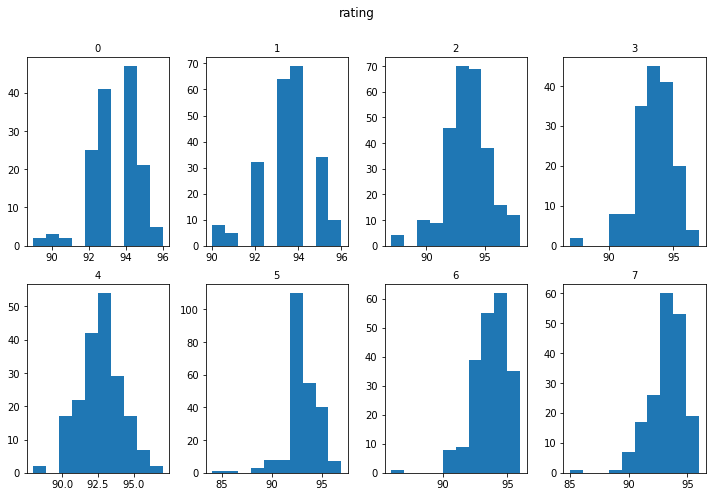

In [ ]:
hist('rating')

클러스터당 평균 rating은 크게 차이나지 않습니다. 근소하지만 가장 높은 평균 rating을 가진 클러스터는 클러스터 2입니다.

클러스터 1은 가장 낮은 rating이 90점을 기록하고 있습니다. 다른 클러스터의 최소 rating이 80점대인 것을 보았을 때, 이 점은 유의할 만한 부분일 수도 있을 것 같습니다.

다음으로는 클러스터별 roast와 agtron을 확인해 보겠습니다.

In [ ]:
roast = df_all[['roast_Light', 'roast_Medium-Light', 'roast_Medium', 'roast_Medium-Dark', 'roast_Dark', 'cluster']].groupby('cluster').sum()
roast

,roast_Light,roast_Medium-Light,roast_Medium,roast_Medium-Dark,roast_Dark
cluster,,,,,
0,20,111,15,0,0
1,43,166,11,2,0
2,52,199,21,2,0
3,31,123,8,1,0
4,28,148,15,1,0
5,46,165,19,2,1
6,34,149,21,5,0
7,27,143,13,1,0


In [ ]:
roast = roast.div(roast.sum(axis=1), axis=0)
roast

,roast_Light,roast_Medium-Light,roast_Medium,roast_Medium-Dark,roast_Dark
cluster,,,,,
0,0.136986,0.760274,0.102740,0.000000,0.000000
1,0.193694,0.747748,0.049550,0.009009,0.000000
2,0.189781,0.726277,0.076642,0.007299,0.000000
3,0.190184,0.754601,0.049080,0.006135,0.000000
4,0.145833,0.770833,0.078125,0.005208,0.000000
5,0.197425,0.708155,0.081545,0.008584,0.004292
6,0.162679,0.712919,0.100478,0.023923,0.000000
7,0.146739,0.777174,0.070652,0.005435,0.000000


In [ ]:
desc('agtron')

agtron                                                              \
         count      mean       std       min       10%       20%       30%   
cluster                                                                      
0        146.0  0.748657  0.035905  0.623529  0.707317  0.725000  0.736842   
1        222.0  0.747991  0.037999  0.597701  0.692308  0.722393  0.738095   
2        274.0  0.749424  0.038961  0.600000  0.692308  0.717949  0.741085   
3        163.0  0.748014  0.031641  0.666667  0.699445  0.724483  0.735855   
4        192.0  0.753763  0.035113  0.636364  0.707419  0.725205  0.743590   
5        233.0  0.752154  0.034928  0.610390  0.704426  0.730769  0.743089   
6        209.0  0.754699  0.032093  0.625000  0.717216  0.727838  0.743150   
7        184.0  0.743048  0.038339  0.618421  0.691026  0.714286  0.724722   

                                                                               
              40%       50%       60%       70%       80%       90%       max  
cluster                                                                        
0        0.743590  0.750000  0.763158  0.767732  0.775000  0.783784  0.870968  
1        0.743590  0.756757  0.763158  0.769231  0.777778  0.783784  0.826087  
2        0.747468  0.756757  0.763158  0.769231  0.775588  0.787767  0.868421  
3        0.746479  0.753247  0.762155  0.766516  0.775000  0.781250  0.822785  
4        0.750000  0.760952  0.766234  0.771429  0.777778  0.789474  0.884615  
5        0.750000  0.761905  0.763467  0.769231  0.775000  0.786295  0.875000  
6        0.750000  0.763158  0.766667  0.775000  0.779221  0.789474  0.875000  
7        0.741935  0.750000  0.760679  0.764706  0.770110  0.782795  0.858696

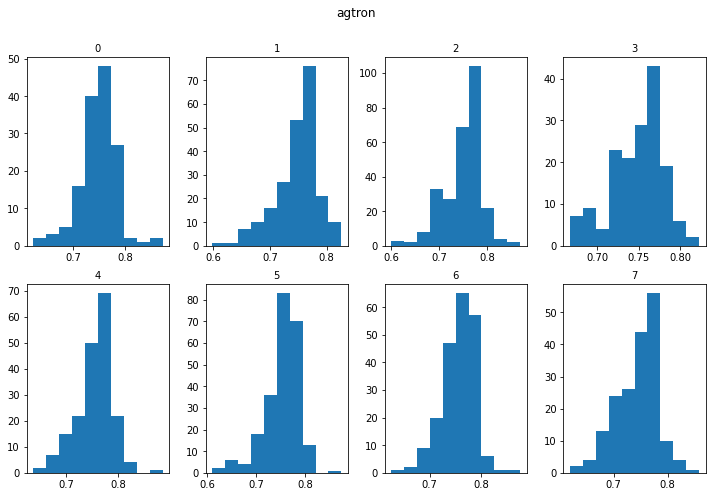

In [ ]:
hist('agtron')

클러스터별 로스팅 포인트를 확인해보면, 다음을 확인할 수 있습니다.

- 클러스터 1, 3, 5는 Light 로스팅의 비율이 높은 편입니다.
- 클러스터 0은 Light 로스팅의 비율이 가장 낮습니다. 그다음으로 클러스터 4, 7의 Light 로스팅 비율이 낮습니다.
- Medium-Light 로스팅의 비율이 가장 높은 클러스터는 클러스터 7입니다. 비율이 낮은 클러스터는 클러스터 5, 6입니다.
- Medium 이상 로스팅의 비율이 가장 높은 클러스터는 클러스터 6입니다. 클러스터 5는 Medium-Dark 로스팅의 비율이 가장 높습니다. 유일한 Dark 로스팅 커피를 보유하한 클러스터는 클러스터 5입니다.

클러스터별 agtron을 확인하면 보다 상세한 커피의 로스팅 정도를 확인할 수 있습니다. 같은 로스팅 포인트(예를 들어 Medium-Light) 안에서도 다른 점수를 가지기 때문입니다. 
- agtron의 평균은 클러스터 6에서 가장 크고, 표준편차는  모든 클러스터에서 비슷한 정도를 보입니다.
- 중앙값 기준 비교적 높은 agtron을 가지는 클러스터는 클러스터 4, 5, 6입니다. 
- 최솟값 기준 가장 높은 agtron을 가지는 클러스터는 클러스터 3입니다. 클러스터 3는 Light 로스팅 비율이 0.19로 낮은 편은 아니었으나 비교적 Medium-Light에 가까운 Light의 비율이 높았던 것 같습니다.
- 반대로 최댓값 기준 가장 높은 agtron을 가지는 클러스터는 클러스터 4입니다. Dark 로스팅된 커피가 클러스터 5에 속했던 것을 기억해 보면, Dark 보다 더 어둡게 로스팅된 Medium-Dark 로스팅 커피가 있었던 것 같습니다. 

다음으로는 각 클러스터별 커피의 원산지를 확인해 보겠습니다.

In [ ]:
region = df_all[['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america', 'cluster']].groupby('cluster').sum()
region

,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america
cluster,,,,,,
0,84,1,26,11,6,19
1,110,0,42,13,16,41
2,114,1,71,16,17,51
3,82,0,41,7,5,30
4,60,4,65,15,9,33
5,106,2,46,16,9,55
6,86,2,53,18,13,36
7,88,0,39,12,5,41


In [ ]:
region = region.div(region.sum(axis=1), axis=0)
region

,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america
cluster,,,,,,
0,0.571429,0.006803,0.176871,0.074830,0.040816,0.129252
1,0.495495,0.000000,0.189189,0.058559,0.072072,0.184685
2,0.422222,0.003704,0.262963,0.059259,0.062963,0.188889
3,0.496970,0.000000,0.248485,0.042424,0.030303,0.181818
4,0.322581,0.021505,0.349462,0.080645,0.048387,0.177419
5,0.452991,0.008547,0.196581,0.068376,0.038462,0.235043
6,0.413462,0.009615,0.254808,0.086538,0.062500,0.173077
7,0.475676,0.000000,0.210811,0.064865,0.027027,0.221622


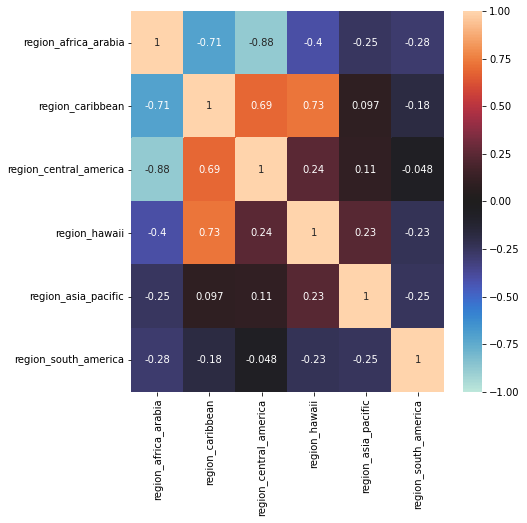

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(region.corr(), vmax=1, vmin=-1, center=0, annot=True)
plt.show()

지역별 비율이 가장 높거나 낮은 클러스터는 다음과 같습니다.

- 아프리카: 클러스터 0에서 최대, 클러스터 4에서 최소
- 카리브 제도: 클러스터 4에서 최대, 클러스터 1, 3, 7에서 최소(존재하지 않음)
- 중앙 아메리카: 클러스터 4에서 최대, 클러스터 0에서 최소 
- 하와이: 클러스터 6에서 최대, 클러스터 3에서 최소
- 아시아 태평양: 클러스터 1에서 최대, 클러스터 7에서 최소
- 남아메리카: 클러스터 5에서 최대, 클러스터 0에서 최소

클러스터 0의 경우, 아프리카 지역의 커피 비율이 가장 높고 중앙 아메리카와 남아메리카의 비율이 가장 낮습니다. 이러한 결과로 보아 아프리카 지역의 커피의 성질은 중앙 아메리카와 남아메리카 지역의 커피의 성질과 제법 다르다고 생각할 수 있을 것 같습니다.

상관행렬 히트맵의 결과를 보아도 아프리카 지역과 중앙 아메리카의 상관관계는 -0.88으로 강한 음의 관계를 가지고 있습니다. 

하와이 지역과 카리브 제도 지역의 상관관계 또한 흥미롭습니다. 0.73라는 상관관계를 통해 섬 지역의 커피 간 비슷한 특징이 있다고 생각할 수도 있을 것 같습니다.

다음으로는 클러스터별 aroma, acid, body, flavor, aftertaste를 확인해 보겠습니다.

In [ ]:
desc('aroma')

aroma                                                              \
         count      mean       std  min  10%  20%  30%  40%  50%  60%  70%   
cluster                                                                      
0        146.0  8.931507  0.253460  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
1        222.0  8.914414  0.310989  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
2        274.0  8.927007  0.412888  8.0  8.0  9.0  9.0  9.0  9.0  9.0  9.0   
3        163.0  8.858896  0.382927  7.0  8.0  9.0  9.0  9.0  9.0  9.0  9.0   
4        192.0  8.781250  0.462253  8.0  8.0  8.0  9.0  9.0  9.0  9.0  9.0   
5        233.0  8.871245  0.394670  7.0  8.0  9.0  9.0  9.0  9.0  9.0  9.0   
6        209.0  8.861244  0.373240  7.0  8.0  9.0  9.0  9.0  9.0  9.0  9.0   
7        184.0  8.831522  0.389600  7.0  8.0  9.0  9.0  9.0  9.0  9.0  9.0   

                         
         80%  90%   max  
cluster                  
0        9.0  9.0   9.0  
1        9.0  9.0  10.0  
2        9.0  9.0  10.0  
3        9.0  9.0  10.0  
4        9.0  9.0  10.0  
5        9.0  9.0  10.0  
6        9.0  9.0  10.0  
7        9.0  9.0   9.0

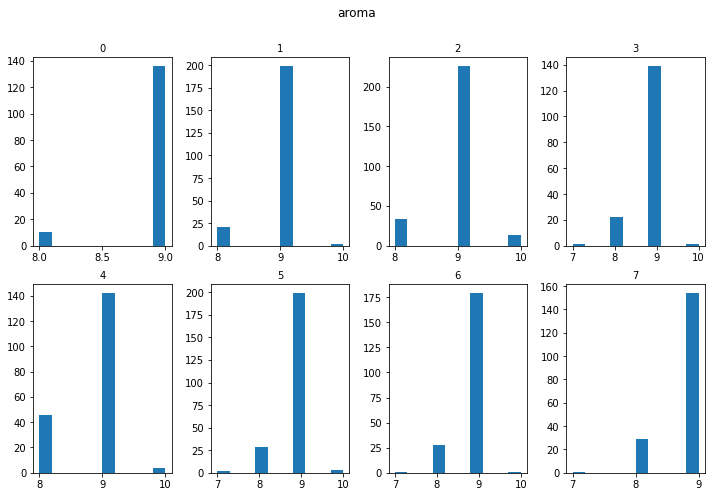

In [ ]:
hist('aroma')

In [ ]:
def cnts(col):
  for i in range(8):
    df = df_all[df_all.cluster==i]
    print('cluster: ', i, df[col].value_counts(normalize=True, sort=True), sep='\n', end='\n\n')

cnts('aroma')

cluster: 
0
9.0    0.931507
8.0    0.068493
Name: aroma, dtype: float64

cluster: 
1
9.0     0.896396
8.0     0.094595
10.0    0.009009
Name: aroma, dtype: float64

cluster: 
2
9.0     0.824818
8.0     0.124088
10.0    0.051095
Name: aroma, dtype: float64

cluster: 
3
9.0     0.852761
8.0     0.134969
10.0    0.006135
7.0     0.006135
Name: aroma, dtype: float64

cluster: 
4
9.0     0.739583
8.0     0.239583
10.0    0.020833
Name: aroma, dtype: float64

cluster: 
5
9.0     0.854077
8.0     0.124464
10.0    0.012876
7.0     0.008584
Name: aroma, dtype: float64

cluster: 
6
9.0     0.856459
8.0     0.133971
10.0    0.004785
7.0     0.004785
Name: aroma, dtype: float64

cluster: 
7
9.0    0.836957
8.0    0.157609
7.0    0.005435
Name: aroma, dtype: float64



- 평균 aroma가 가장 높은 클러스터는 클러스터 0입니다. 비교적 높은 평균 aroma를 가진 클러스터는 클러스터 0, 1, 2입니다. 
- 클러스터 0, 1은 90% 이상의 커피가 aroma에서 9점 이상을 받았습니다. 
- 85% 이상의 커피가 9점 이상인 클러스터는 클러스터 0, 1, 2, 3, 5, 6입니다.

In [ ]:
desc('acid')

acid                                                              \
         count      mean       std  min  10%  20%  30%  40%  50%  60%  70%   
cluster                                                                      
0        146.0  8.630137  0.498462  7.0  8.0  8.0  8.0  9.0  9.0  9.0  9.0   
1        222.0  8.603604  0.499398  7.0  8.0  8.0  8.0  9.0  9.0  9.0  9.0   
2        274.0  8.565693  0.552442  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   
3        163.0  8.533742  0.536129  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   
4        192.0  8.390625  0.577516  7.0  8.0  8.0  8.0  8.0  8.0  9.0  9.0   
5        233.0  8.545064  0.563918  6.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   
6        209.0  8.588517  0.512406  7.0  8.0  8.0  8.0  8.2  9.0  9.0  9.0   
7        184.0  8.565217  0.507955  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   

                         
         80%  90%   max  
cluster                  
0        9.0  9.0   9.0  
1        9.0  9.0   9.0  
2        9.0  9.0  10.0  
3        9.0  9.0  10.0  
4        9.0  9.0  10.0  
5        9.0  9.0   9.0  
6        9.0  9.0   9.0  
7        9.0  9.0   9.0

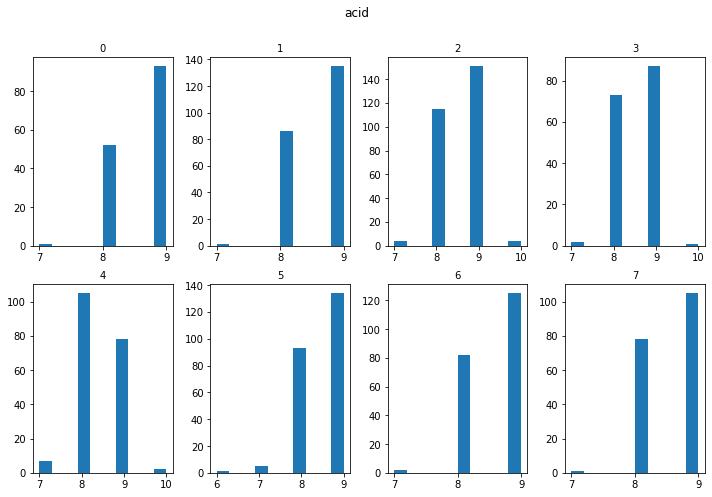

In [ ]:
hist('acid')

In [ ]:
cnts('acid')

cluster: 
0
9.0    0.636986
8.0    0.356164
7.0    0.006849
Name: acid, dtype: float64

cluster: 
1
9.0    0.608108
8.0    0.387387
7.0    0.004505
Name: acid, dtype: float64

cluster: 
2
9.0     0.551095
8.0     0.419708
7.0     0.014599
10.0    0.014599
Name: acid, dtype: float64

cluster: 
3
9.0     0.533742
8.0     0.447853
7.0     0.012270
10.0    0.006135
Name: acid, dtype: float64

cluster: 
4
8.0     0.546875
9.0     0.406250
7.0     0.036458
10.0    0.010417
Name: acid, dtype: float64

cluster: 
5
9.0    0.575107
8.0    0.399142
7.0    0.021459
6.0    0.004292
Name: acid, dtype: float64

cluster: 
6
9.0    0.598086
8.0    0.392344
7.0    0.009569
Name: acid, dtype: float64

cluster: 
7
9.0    0.570652
8.0    0.423913
7.0    0.005435
Name: acid, dtype: float64



- acid는 aroma에 비해 평균 점수가 조금 낮습니다.
- 평균 acid가 가장 높은 클러스터는 클러스터 0입니다. 비교적 높은 평균 acid를 가지는 클러스터는 0, 1, 6입니다. 
- 클러스터 0, 1은 60% 이상의 커피가 aroma에서 9점 이상을 받았습니다. 
- 중앙값 기준, 클러스터 4의 점수는 8점으로 나머지 클러스터보다 1점 낮습니다.

In [ ]:
desc('body')

body                                                              \
         count      mean       std  min  10%  20%  30%  40%  50%  60%  70%   
cluster                                                                      
0        146.0  8.684932  0.466142  8.0  8.0  8.0  8.0  9.0  9.0  9.0  9.0   
1        222.0  8.734234  0.442738  8.0  8.0  8.0  9.0  9.0  9.0  9.0  9.0   
2        274.0  8.708029  0.486606  7.0  8.0  8.0  9.0  9.0  9.0  9.0  9.0   
3        163.0  8.576687  0.507909  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   
4        192.0  8.541667  0.509936  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   
5        233.0  8.682403  0.484670  7.0  8.0  8.0  8.0  9.0  9.0  9.0  9.0   
6        209.0  8.698565  0.470319  7.0  8.0  8.0  9.0  9.0  9.0  9.0  9.0   
7        184.0  8.565217  0.507955  7.0  8.0  8.0  8.0  8.0  9.0  9.0  9.0   

                         
         80%  90%   max  
cluster                  
0        9.0  9.0   9.0  
1        9.0  9.0   9.0  
2        9.0  9.0  10.0  
3        9.0  9.0   9.0  
4        9.0  9.0   9.0  
5        9.0  9.0   9.0  
6        9.0  9.0   9.0  
7        9.0  9.0   9.0

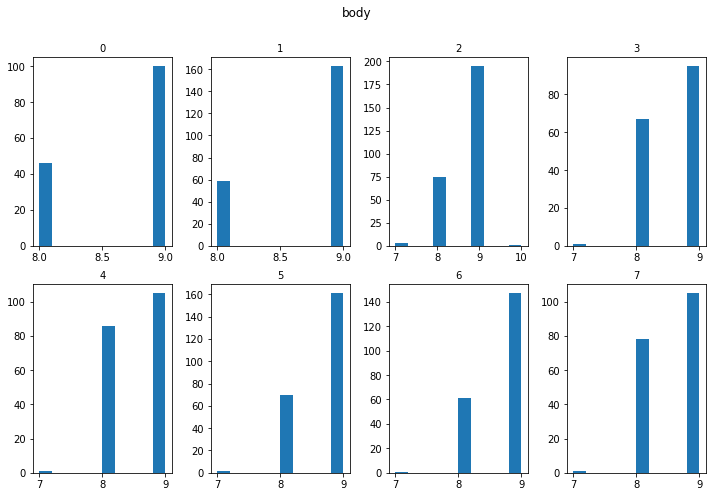

In [ ]:
hist('body')

In [ ]:
cnts('body')

cluster: 
0
9.0    0.684932
8.0    0.315068
Name: body, dtype: float64

cluster: 
1
9.0    0.734234
8.0    0.265766
Name: body, dtype: float64

cluster: 
2
9.0     0.711679
8.0     0.273723
7.0     0.010949
10.0    0.003650
Name: body, dtype: float64

cluster: 
3
9.0    0.582822
8.0    0.411043
7.0    0.006135
Name: body, dtype: float64

cluster: 
4
9.0    0.546875
8.0    0.447917
7.0    0.005208
Name: body, dtype: float64

cluster: 
5
9.0    0.690987
8.0    0.300429
7.0    0.008584
Name: body, dtype: float64

cluster: 
6
9.0    0.703349
8.0    0.291866
7.0    0.004785
Name: body, dtype: float64

cluster: 
7
9.0    0.570652
8.0    0.423913
7.0    0.005435
Name: body, dtype: float64



- 평균 body가 가장 높은 클러스터는 클러스터 1입니다. 비교적 높은 평균 aroma를 가진 클러스터는 클러스터 1, 2, 6입니다. 
- 클러스터 1, 2, 6은 70% 이상의 커피가 body에서 9점 이상을 받았습니다. 
- 60% 이상의 커피가 9점 이상인 클러스터는 클러스터 0, 1, 2, 5, 6입니다.

In [ ]:
desc('flavor')

flavor                                                              \
         count      mean       std  min  10%  20%  30%  40%  50%  60%  70%   
cluster                                                                      
0        146.0  9.020548  0.248282  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
1        222.0  9.031532  0.291503  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
2        274.0  9.069343  0.390747  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
3        163.0  8.969325  0.281603  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
4        192.0  8.958333  0.352007  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
5        233.0  8.995708  0.286143  7.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
6        209.0  8.980861  0.309493  8.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
7        184.0  8.956522  0.292457  7.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   

                          
         80%   90%   max  
cluster                   
0        9.0   9.0  10.0  
1        9.0   9.0  10.0  
2        9.0  10.0  10.0  
3        9.0   9.0  10.0  
4        9.0   9.0  10.0  
5        9.0   9.0  10.0  
6        9.0   9.0  10.0  
7        9.0   9.0  10.0

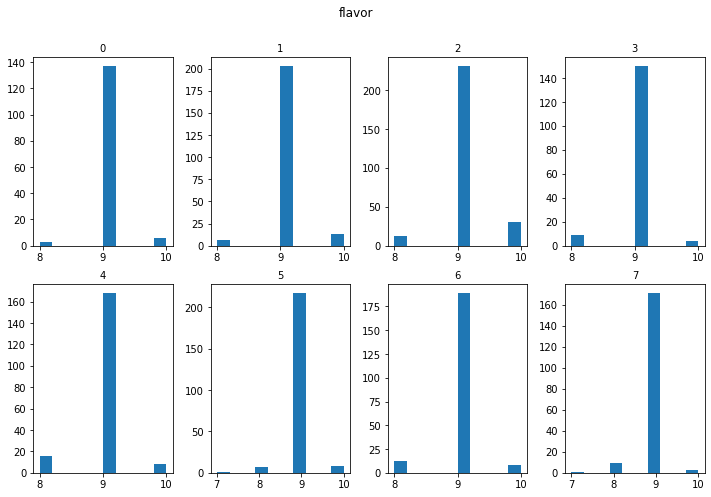

In [ ]:
hist('flavor')

In [ ]:
cnts('flavor')

cluster: 
0
9.0     0.938356
10.0    0.041096
8.0     0.020548
Name: flavor, dtype: float64

cluster: 
1
9.0     0.914414
10.0    0.058559
8.0     0.027027
Name: flavor, dtype: float64

cluster: 
2
9.0     0.843066
10.0    0.113139
8.0     0.043796
Name: flavor, dtype: float64

cluster: 
3
9.0     0.920245
8.0     0.055215
10.0    0.024540
Name: flavor, dtype: float64

cluster: 
4
9.0     0.875000
8.0     0.083333
10.0    0.041667
Name: flavor, dtype: float64

cluster: 
5
9.0     0.931330
10.0    0.034335
8.0     0.030043
7.0     0.004292
Name: flavor, dtype: float64

cluster: 
6
9.0     0.904306
8.0     0.057416
10.0    0.038278
Name: flavor, dtype: float64

cluster: 
7
9.0     0.929348
8.0     0.048913
10.0    0.016304
7.0     0.005435
Name: flavor, dtype: float64



- 평균 flavor가 가장 높은 클러스터는 클러스터 2입니다. 비교적 높은 평균 aroma를 가진 클러스터는 클러스터 0, 1, 2입니다. 다만 flavor에서 각 클러스터간 평균은 큰 차이를 보이지 않습니다. 
- 모든 클러스터에서 90% 이상의 커피가 flavor에서 9점 이상을 받았습니다. 
- 95% 이상의 커피가 9점 이상인 클러스터는 클러스터 0, 1, 2, 5입니다.


In [ ]:
desc('aftertaste')

aftertaste                                                         \
             count      mean       std  min  10%  20%  30%  40%  50%  60%   
cluster                                                                     
0            146.0  8.130137  0.458840  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
1            222.0  8.166667  0.460343  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
2            274.0  8.204380  0.543206  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
3            163.0  8.116564  0.449865  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
4            192.0  8.046875  0.504317  7.0  7.1  8.0  8.0  8.0  8.0  8.0   
5            233.0  8.141631  0.526562  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
6            209.0  8.114833  0.466390  7.0  8.0  8.0  8.0  8.0  8.0  8.0   
7            184.0  8.092391  0.357812  7.0  8.0  8.0  8.0  8.0  8.0  8.0   

                             
         70%  80%  90%  max  
cluster                      
0        8.0  8.0  9.0  9.0  
1        8.0  8.8  9.0  9.0  
2        8.0  9.0  9.0  9.0  
3        8.0  8.0  9.0  9.0  
4        8.0  8.0  9.0  9.0  
5        8.0  9.0  9.0  9.0  
6        8.0  8.0  9.0  9.0  
7        8.0  8.0  9.0  9.0

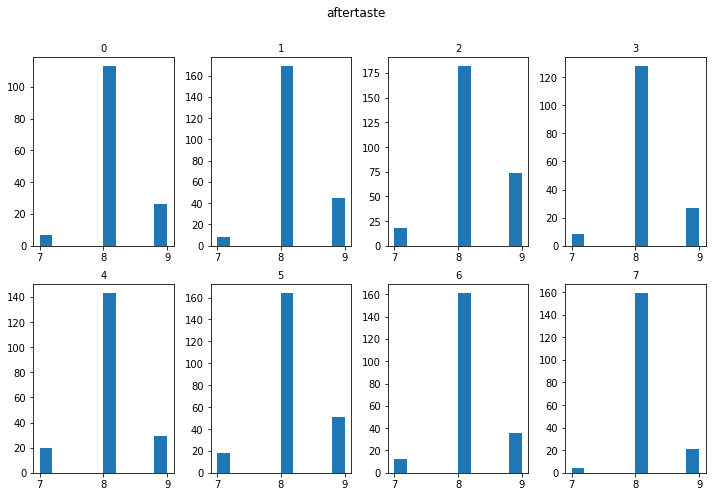

In [ ]:
hist('aftertaste')

In [ ]:
cnts('aftertaste')

cluster: 
0
8.0    0.773973
9.0    0.178082
7.0    0.047945
Name: aftertaste, dtype: float64

cluster: 
1
8.0    0.761261
9.0    0.202703
7.0    0.036036
Name: aftertaste, dtype: float64

cluster: 
2
8.0    0.664234
9.0    0.270073
7.0    0.065693
Name: aftertaste, dtype: float64

cluster: 
3
8.0    0.785276
9.0    0.165644
7.0    0.049080
Name: aftertaste, dtype: float64

cluster: 
4
8.0    0.744792
9.0    0.151042
7.0    0.104167
Name: aftertaste, dtype: float64

cluster: 
5
8.0    0.703863
9.0    0.218884
7.0    0.077253
Name: aftertaste, dtype: float64

cluster: 
6
8.0    0.770335
9.0    0.172249
7.0    0.057416
Name: aftertaste, dtype: float64

cluster: 
7
8.0    0.864130
9.0    0.114130
7.0    0.021739
Name: aftertaste, dtype: float64



- 평균 aftertaste가 가장 높은 클러스터는 클러스터 2입니다. 비교적 높은 평균 aftertaste를 가진 클러스터는 클러스터 1, 2, 5입니다. 
- 클러스터 2는 25% 이상의 커피가 aftertaste에서 9점 이상을 받았습니다. 
- 20% 이상의 커피가 9점 이상인 클러스터는 클러스터 1, 2, 5입니다.

다음으로 각 클러스터별 어떤 블라인드 평가가 존재하는지 확인해 보겠습니다. 각 클러스터에서 임의로 10개의 커피를 선택해 평가를 확인합니다.

In [ ]:
for k in range(8):
  cluster_df = df[df.cluster==k]
  print('cluster: ', k)
  for i in range(10):
    print(cluster_df.blind.sample(10, random_state=0).iloc[i][:5])
  print('')

cluster:  0
['Deeply sweet', ' crisply chocolaty', ' Baking chocolate', ' almond nougat', ' pear']
['Deeply sweet', ' slightly fermenty', ' Dark chocolate', ' orange zest', ' whiskey barrel']
['Bright', ' deeply chocolaty', ' Dark chocolate', ' grapefruit zest', ' plum']
['Richly sweet-savory', ' Tamarind', ' cedar', ' honeysuckle', ' toffee']
['Crisp', ' elegantly sweet-savory', ' Baker’s chocolate', ' lemon blossom', ' fine musk']
['Rich-toned', ' deeply aromatic', ' Dark chocolate', ' hop flowers', ' brown sugar']
['Richly sweet-tart', ' deeply nuanced', ' Lychee', ' pink grapefruit zest', ' sassafras']
['High-toned', ' floral-driven', ' Star jasmine', ' bergamot', ' red plum']
['Crisply sweet', ' richly savory', ' vibrant', ' Red currant', ' jasmine']
['Balanced', ' sweetly savory', ' Narcissus', ' date', ' orange zest']

cluster:  1
['Cleanly fruit-forward', ' high-toned', ' Strawberry guava', ' lemon verbena', ' cocoa nib']
['Sweet-toned', ' richly savory', ' Dried fig', ' ginsen

각 클러스터당 확인할 수 있는 커피의 특징은 다음과 같습니다.

1. 클러스터 0: 달콤하고 초콜릿스러운 느낌
2. 클러스터 1: 레몬, 라임, 사과 등 다양한 과일 느낌
3. 클러스터 2: 자스민, 진달래 등 과일, 꽃, 허브 느낌
4. 클러스터 3: 달콤하고 섬세한 느낌, 복합적인 느낌
5. 클러스터 4: 달콤한 느낌, 과일과 코코아의 단맛의 느낌
6. 클러스터 5: 달콤한 느낌, 과일과 초콜릿의 단맛의 느낌
7. 클러스터 6: 달콤하고 초콜릿스러운 느낌
8. 클러스터 7: 밝고 쥬시한 느낌 

물론 이러한 느낌은 클러스터 전체를 설명하는 것이 아닌 임의의 10개의 커피에 대한 평가입니다. 이점 참고해 주세요.

마지막으로 각 클러스터에 속한 커피의 이름을 확인해 보겠습니다. 마찬가지로 클러스터당 10개를 임의로 선택합니다.

In [ ]:
for k in range(8):
  cluster_df = df[df.cluster==k]
  print('cluster: ', k)
  for i in range(10):
    print(cluster_df.name.sample(10, random_state=10).iloc[i])
  print('')

cluster:  0
Mandheling Onan Ganjang
Puna Champagne Natural Anaerobic
Kenya Nyeri
Colombia La Virgen Microlot
Sumatra Pantan Musara
Brazil Recreio Selectivo
Kenya Nyeri Gathaithi
Gelena Geisha
COE Brazil Naturals 2017 Sitio Esperanza 7th place
Kenya Lenana AA Plus

cluster:  1
Colombian Supremo
Gesha Village Natural Lot #19
Estelí Nicaragua
ASOPCAFA Colombia
Tanzania Peaberry
Ka’u Lehua Black Honey
Panama Abu Geisha Lot 6
Ethiopia Haro Guta Natural
Panama Finca Deborah Afterglow Geisha Natural
Elida Natural ASD (Panama)

cluster:  2
Panama Ninety Plus Perci Lot 50
Ethiopia Natural Guji Uraga Tome 74110 Lot K06
Colombian Anaerobic
Honduras Buenos Aires
Monteblanco Cold Fermentation Geisha
Ethiopia Odola Washed
Panama Perci Geisha Natural
Kibugu Kenya
Kenya Rungeto
Taiwan Natural Alishan Zhuo-Wu Geisha

cluster:  3
Ethiopian Sweet Lily
Kenya Rugeto Peaberry
Costa Rica Hacienda Tobosi Villalobos Anaerobic Natural
Ka’u IPA Natural
Seasonal Ethiopia Yirgacheffe Natural
Elida Natural Dragonfl

각 클러스터당 커피의 이름을 확인할 수 있었습니다. 과일, 꽃, 허브 느낌이 대표적이었던 클러스터 1, 2에서 비슷한 특징을 가지는 게이샤와 에티오피아의 이름이 언뜻 보이는 것 같습니다. 

모든 커피의 정보와 클러스터 번호를 저장한 데이터프레임을 생성하여 저장합니다. 

In [ ]:
coffee_cluster = df.drop(['blind', 'mergeon'], axis=1)
coffee_cluster_name = coffee_cluster[['name', 'cluster']]

coffee_cluster.sort_values(by='cluster', inplace=True)
coffee_cluster_name.sort_values(by='cluster', inplace=True)

In [ ]:
coffee_cluster.to_csv('coffee_cluster.csv', index=False)
coffee_cluster_name.to_csv('coffee_cluster_name.csv', index=False)

사용한 분석 코드와 결과 csv 파일은 모두 제 깃허브에 업로드 하겠습니다. 혹시 필요하신 분이 계시다면 마음껏 사용하셔도 됩니다.



# 마무리

이렇게 몇 가지 간단한 방법으로 약 1,600종의 커피를 분류해 보았습니다. 전체 군집 결과의 품질을 봤을 땐 아쉬운 점이 많고, 개선해야 할 부분이 있겠지만 거창한 무언가를 하려고 한 것이 아니었기 때문에 이쯤에서 마무리하려고 합니다.

계산된 클러스터 분류 결과를 바탕으로 조금 더 다양한 인사이트를 얻을 수 있습니다. 각 클러스터를 대표하는 커피 8종류를 찾고 이를 바탕으로 자신의 취향을 찾아 나갈 수 있습니다. 이런 방법은 스페셜티 커피를 처음 시작하는 분들에게 좋을 것 같네요.

클러스터 분류 결과를 제외하고서도, 각 지역별 커피의 특징(aroma, acid 등)을 계산하여 지역에 따른 커피 특징을 정량화할 수도 있고, 커피 총점에 어떤 요인이 가장 크게 작용하는지도 알아볼 수도 있을 것입니다. 커피에 관심 있으신 분들은 이것저것 시도해볼 수 있는 재미있는 데이터셋이었습니다.

추가로, 이 분석 코드를 실행해보려고 하시는 분들에게 유의할 점을 한 가지 말씀드립니다. KMeans와 같은 사이킷런 기반 코드는 random_state를 고정하여 여러분들의 환경에도 차이가 나타나지 않겠지만, Word2Vec을 사용하는 부분에서는 고정 시드를 설정하지 않았기 때문에 결과적으로 여러분들의 환경에서 전체 코드를 실행하면 다른 분류 결과가 도출될 것입니다. 저도 이번에 Word2Vec을 처음 사용해봐서 마무리할 때가 되어서 알게 되었네요...

전체 코드를 실행했을 때 클러스터의 모습이 달라지는 것은 당연한 것이니 새로운 클러스터링 결과를 얻고자 하신다면 랜덤 시드 조절을 해보셔도 좋을 것 같습니다.

이상으로 포스팅을 마치겠습니다. 이 짧은 포스팅이 여러분들의 커피 여행에 작은 도움이 되었기를 바랍니다.

감사합니다!



